In [1]:
import pandas as pd
import os

In [2]:
data_path = r"C:\IP\greenmlops\data\raw\airquality"

In [3]:
press_file = os.path.join(data_path, "hourly_PRESS_2024.csv")
df = pd.read_csv(press_file)

C:\Users\arunp\AppData\Local\Temp\ipykernel_5600\3501481589.py:2: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(press_file)


In [4]:
df.columns.tolist()

['State Code',
 'County Code',
 'Site Num',
 'Parameter Code',
 'POC',
 'Latitude',
 'Longitude',
 'Datum',
 'Parameter Name',
 'Date Local',
 'Time Local',
 'Date GMT',
 'Time GMT',
 'Sample Measurement',
 'Units of Measure',
 'MDL',
 'Uncertainty',
 'Qualifier',
 'Method Type',
 'Method Code',
 'Method Name',
 'State Name',
 'County Name',
 'Date of Last Change']

In [5]:
df.head(2)

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Date Local,...,Units of Measure,MDL,Uncertainty,Qualifier,Method Type,Method Code,Method Name,State Name,County Name,Date of Last Change
0,1,53,1000,64101,1,31.0921,-87.5435,NAD83,Barometric pressure,2024-01-01,...,Millibars,0.5,NaN,NaN,Non-FRM,60,Instrumental - Vaisala 555B Pressure Sensor,Alabama,Escambia,2024-07-15
1,1,53,1000,64101,1,31.0921,-87.5435,NAD83,Barometric pressure,2024-01-01,...,Millibars,0.5,NaN,NaN,Non-FRM,60,Instrumental - Vaisala 555B Pressure Sensor,Alabama,Escambia,2024-07-15


In [7]:
ca_data = df[df['State Name'] == 'California']

In [8]:
ca_data

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Date Local,...,Units of Measure,MDL,Uncertainty,Qualifier,Method Type,Method Code,Method Name,State Name,County Name,Date of Last Change
43029,6,19,7,64101,1,36.705474,-119.741332,NAD83,Barometric pressure,2024-01-01,...,Millibars,0.7,NaN,NaN,Non-FRM,14,INSTRUMENTAL - BAROMETRIC SENSOR,California,Fresno,2024-09-11
43030,6,19,7,64101,1,36.705474,-119.741332,NAD83,Barometric pressure,2024-01-01,...,Millibars,0.7,NaN,NaN,Non-FRM,14,INSTRUMENTAL - BAROMETRIC SENSOR,California,Fresno,2024-09-11
43031,6,19,7,64101,1,36.705474,-119.741332,NAD83,Barometric pressure,2024-01-01,...,Millibars,0.7,NaN,NaN,Non-FRM,14,INSTRUMENTAL - BAROMETRIC SENSOR,California,Fresno,2024-09-11
43032,6,19,7,64101,1,36.705474,-119.741332,NAD83,Barometric pressure,2024-01-01,...,Millibars,0.7,NaN,NaN,Non-FRM,14,INSTRUMENTAL - BAROMETRIC SENSOR,California,Fresno,2024-09-11
43033,6,19,7,64101,1,36.705474,-119.741332,NAD83,Barometric pressure,2024-01-01,...,Millibars,0.7,NaN,NaN,Non-FRM,14,INSTRUMENTAL - BAROMETRIC SENSOR,California,Fresno,2024-09-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425985,6,107,2010,64101,1,36.031831,-119.055018,WGS84,Barometric pressure,2024-12-31,...,Millibars,0.7,NaN,NaN,Non-FRM,14,INSTRUMENTAL - BAROMETRIC SENSOR,California,Tulare,2025-02-19
425986,6,107,2010,64101,1,36.031831,-119.055018,WGS84,Barometric pressure,2024-12-31,...,Millibars,0.7,NaN,NaN,Non-FRM,14,INSTRUMENTAL - BAROMETRIC SENSOR,California,Tulare,2025-02-19
425987,6,107,2010,64101,1,36.031831,-119.055018,WGS84,Barometric pressure,2024-12-31,...,Millibars,0.7,NaN,NaN,Non-FRM,14,INSTRUMENTAL - BAROMETRIC SENSOR,California,Tulare,2025-02-19
425988,6,107,2010,64101,1,36.031831,-119.055018,WGS84,Barometric pressure,2024-12-31,...,Millibars,0.7,NaN,NaN,Non-FRM,14,INSTRUMENTAL - BAROMETRIC SENSOR,California,Tulare,2025-02-19


In [9]:
station_counts = ca_data.groupby(['Site Num', 'County Name', 'Latitude', 'Longitude']).size().reset_index(name='readings')
station_counts = station_counts.sort_values('readings', ascending=False)

In [10]:
print(f"Total CA stations: {len(station_counts)}")
print("\nTop 10 stations:")
print(station_counts.head(10).to_string())

Total CA stations: 45

Top 10 stations:
    Site Num     County Name   Latitude   Longitude  readings
3          5            Mono  37.962069 -119.120278      8781
42      8001       Riverside  33.999580 -117.416010      8781
27      2007       Riverside  33.725370 -116.206842      8781
25      1602     Los Angeles  34.010290 -118.068500      8779
40      5001       Riverside  33.852750 -116.541010      8779
4          6      Stanislaus  37.488317 -120.836008      8778
12        23            Inyo  36.280597 -118.011661      8777
15       113     Los Angeles  34.051110 -118.456360      8777
37      4001  San Bernardino  34.416510 -117.285630      8776
43      8005       Riverside  33.996360 -117.492400      8776


In [11]:
station_counts.to_csv(os.path.join(data_path, "ca_stations_ranked.csv"), index=False)


In [14]:

# C:\IP\greenmlops\data\raw\airquality\hourly_PM2.5.csv
# Load PM2.5 data (2.3 GB - will take a minute)
pm25_file = os.path.join(data_path, "hourly_PM2.5.csv")
print("Loading PM2.5 data...")
df = pd.read_csv(pm25_file)

# Filter California
ca_data = df[df['State Name'] == 'California']

# Count readings per station
station_counts = ca_data.groupby(['Site Num', 'County Name', 'Latitude', 'Longitude']).size().reset_index(name='readings')
station_counts = station_counts.sort_values('readings', ascending=False)

print(f"\nTotal CA PM2.5 stations: {len(station_counts)}")
print("\nTop 10 PM2.5 stations:")
print(station_counts.head(10).to_string())

# Check Los Angeles specifically
la_stations = station_counts[station_counts['County Name'] == 'Los Angeles']
print(f"\nLos Angeles stations: {len(la_stations)}")
print(la_stations.head(5).to_string())

# Save
station_counts.to_csv(os.path.join(data_path, "ca_pm25_stations_ranked.csv"), index=False)
print("\nSaved!")

Loading PM2.5 data...


C:\Users\arunp\AppData\Local\Temp\ipykernel_5600\3152389745.py:5: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(pm25_file)



Total CA PM2.5 stations: 116

Top 10 PM2.5 stations:
    Site Num     County Name   Latitude   Longitude  readings
85      1201       San Diego  33.362593 -117.090230     17568
76      1016       San Diego  32.845709 -117.123964     17443
88      2002         Ventura  34.276316 -118.683685     17291
9          3          Sutter  39.138773 -121.618549     17260
54       306  San Bernardino  34.510961 -117.325540     17124
45        12      Sacramento  38.683304 -121.164457     16880
53        77       San Diego  32.650900 -116.365000     16514
80      1023            Inyo  37.362137 -118.417478     15842
83      1033            Inyo  37.155494 -118.293547     13578
4          2            Inyo  37.360684 -118.330783      8758

Los Angeles stations: 5
     Site Num  County Name   Latitude   Longitude  readings
105      4008  Los Angeles  33.859662 -118.200707      8637
84       1103  Los Angeles  34.066590 -118.226880      8624
106      4009  Los Angeles  33.793713 -118.171019      8434

In [15]:

data_path = r"C:\IP\greenmlops\data\raw\airquality"

# Load PM2.5 data
pm25_file = os.path.join(data_path, "hourly_PM2.5.csv")
print("Loading PM2.5 data...")
df = pd.read_csv(pm25_file)

# Filter for Site 4008 (Los Angeles)
site_data = df[(df['State Name'] == 'California') & (df['Site Num'] == 4008)]

print(f"\nTotal records for Site 4008: {len(site_data)}")
print(f"Date range: {site_data['Date Local'].min()} to {site_data['Date Local'].max()}")

# Check columns we need
print("\nColumns available:")
print(site_data.columns.tolist())

# Save the filtered data
output_file = os.path.join(data_path, "LA_PM25_Site4008_2024.csv")
site_data.to_csv(output_file, index=False)
print(f"\nSaved to: {output_file}")

# Quick stats
print(f"\nPM2.5 stats:")
print(site_data['Sample Measurement'].describe())

Loading PM2.5 data...


C:\Users\arunp\AppData\Local\Temp\ipykernel_5600\1306285574.py:6: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(pm25_file)



Total records for Site 4008: 8637
Date range: 2024-01-01 to 2024-12-31

Columns available:
['State Code', 'County Code', 'Site Num', 'Parameter Code', 'POC', 'Latitude', 'Longitude', 'Datum', 'Parameter Name', 'Date Local', 'Time Local', 'Date GMT', 'Time GMT', 'Sample Measurement', 'Units of Measure', 'MDL', 'Uncertainty', 'Qualifier', 'Method Type', 'Method Code', 'Method Name', 'State Name', 'County Name', 'Date of Last Change']

Saved to: C:\IP\greenmlops\data\raw\airquality\LA_PM25_Site4008_2024.csv

PM2.5 stats:
count    8637.000000
mean       12.658886
std         8.761895
min        -3.100000
25%         7.100000
50%        10.500000
75%        15.700000
max       137.000000
Name: Sample Measurement, dtype: float64


In [16]:
import pandas as pd
import os

data_path = r"C:\IP\greenmlops\data\raw\airquality"

# List of ALL files (including PM2.5)
pollutant_files = [
    'hourly_PM2.5.csv',      # TARGET VARIABLE
    'hourly_CO.csv',
    'hourly_NO2.csv', 
    'hourly_Ozone.csv',
    'hourly_PM10.csv',
    'hourly_PRESS_2024.csv',
    'hourly_RH_DP_2024.csv',
    'hourly_SO2.csv',
    'hourly_TEMP_2024.csv',
    'hourly_WIND_2024.csv'
]

all_data = {}

for file in pollutant_files:
    print(f"Loading {file}...")
    filepath = os.path.join(data_path, file)
    df = pd.read_csv(filepath)
    
    site_data = df[(df['State Name'] == 'California') & (df['Site Num'] == 4008)]
    
    if len(site_data) > 0:
        pollutant = file.replace('hourly_', '').replace('.csv', '').replace('_2024', '')
        all_data[pollutant] = site_data
        print(f"  ✅ {pollutant}: {len(site_data)} records")
    else:
        print(f"  ❌ {file}: NO DATA for Site 4008")

print(f"\nAvailable: {list(all_data.keys())}")

Loading hourly_PM2.5.csv...


C:\Users\arunp\AppData\Local\Temp\ipykernel_5600\2336458178.py:25: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


  ✅ PM2.5: 8637 records
Loading hourly_CO.csv...


C:\Users\arunp\AppData\Local\Temp\ipykernel_5600\2336458178.py:25: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


  ❌ hourly_CO.csv: NO DATA for Site 4008
Loading hourly_NO2.csv...


C:\Users\arunp\AppData\Local\Temp\ipykernel_5600\2336458178.py:25: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


  ✅ NO2: 8710 records
Loading hourly_Ozone.csv...


C:\Users\arunp\AppData\Local\Temp\ipykernel_5600\2336458178.py:25: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


  ❌ hourly_Ozone.csv: NO DATA for Site 4008
Loading hourly_PM10.csv...


C:\Users\arunp\AppData\Local\Temp\ipykernel_5600\2336458178.py:25: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


  ❌ hourly_PM10.csv: NO DATA for Site 4008
Loading hourly_PRESS_2024.csv...


C:\Users\arunp\AppData\Local\Temp\ipykernel_5600\2336458178.py:25: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


  ❌ hourly_PRESS_2024.csv: NO DATA for Site 4008
Loading hourly_RH_DP_2024.csv...


C:\Users\arunp\AppData\Local\Temp\ipykernel_5600\2336458178.py:25: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


  ✅ RH_DP: 8776 records
Loading hourly_SO2.csv...


C:\Users\arunp\AppData\Local\Temp\ipykernel_5600\2336458178.py:25: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


  ❌ hourly_SO2.csv: NO DATA for Site 4008
Loading hourly_TEMP_2024.csv...


C:\Users\arunp\AppData\Local\Temp\ipykernel_5600\2336458178.py:25: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


  ✅ TEMP: 8776 records
Loading hourly_WIND_2024.csv...


C:\Users\arunp\AppData\Local\Temp\ipykernel_5600\2336458178.py:25: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


  ✅ WIND: 17552 records

Available: ['PM2.5', 'NO2', 'RH_DP', 'TEMP', 'WIND']


In [17]:


data_path = r"C:\IP\greenmlops\data\raw\airquality"

# List of ALL files (including PM2.5)
pollutant_files = [
    'hourly_PM2.5.csv',      # TARGET VARIABLE
    'hourly_CO.csv',
    'hourly_NO2.csv', 
    'hourly_Ozone.csv',
    'hourly_PM10.csv',
    'hourly_PRESS_2024.csv',
    'hourly_RH_DP_2024.csv',
    'hourly_SO2.csv',
    'hourly_TEMP_2024.csv',
    'hourly_WIND_2024.csv'
]

all_data = {}

for file in pollutant_files:
    print(f"Loading {file}...")
    filepath = os.path.join(data_path, file)
    df = pd.read_csv(filepath)
    
    site_data = df[(df['State Name'] == 'California') & (df['Site Num'] == 9)]
    
    if len(site_data) > 0:
        pollutant = file.replace('hourly_', '').replace('.csv', '').replace('_2024', '')
        all_data[pollutant] = site_data
        print(f"  ✅ {pollutant}: {len(site_data)} records")
    else:
        print(f"  ❌ {file}: NO DATA for Site 9")

print(f"\nAvailable: {list(all_data.keys())}")

Loading hourly_PM2.5.csv...


C:\Users\arunp\AppData\Local\Temp\ipykernel_5600\3436223042.py:22: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


  ✅ PM2.5: 33912 records
Loading hourly_CO.csv...


C:\Users\arunp\AppData\Local\Temp\ipykernel_5600\3436223042.py:22: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


  ✅ CO: 1281 records
Loading hourly_NO2.csv...


C:\Users\arunp\AppData\Local\Temp\ipykernel_5600\3436223042.py:22: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


  ✅ NO2: 1372 records
Loading hourly_Ozone.csv...


C:\Users\arunp\AppData\Local\Temp\ipykernel_5600\3436223042.py:22: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


  ✅ Ozone: 32283 records
Loading hourly_PM10.csv...


C:\Users\arunp\AppData\Local\Temp\ipykernel_5600\3436223042.py:22: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


  ❌ hourly_PM10.csv: NO DATA for Site 9
Loading hourly_PRESS_2024.csv...


C:\Users\arunp\AppData\Local\Temp\ipykernel_5600\3436223042.py:22: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


  ❌ hourly_PRESS_2024.csv: NO DATA for Site 9
Loading hourly_RH_DP_2024.csv...


C:\Users\arunp\AppData\Local\Temp\ipykernel_5600\3436223042.py:22: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


  ✅ RH_DP: 17332 records
Loading hourly_SO2.csv...


C:\Users\arunp\AppData\Local\Temp\ipykernel_5600\3436223042.py:22: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


  ❌ hourly_SO2.csv: NO DATA for Site 9
Loading hourly_TEMP_2024.csv...


C:\Users\arunp\AppData\Local\Temp\ipykernel_5600\3436223042.py:22: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


  ✅ TEMP: 17334 records
Loading hourly_WIND_2024.csv...


C:\Users\arunp\AppData\Local\Temp\ipykernel_5600\3436223042.py:22: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


  ✅ WIND: 34666 records

Available: ['PM2.5', 'CO', 'NO2', 'Ozone', 'RH_DP', 'TEMP', 'WIND']


In [18]:


data_path = r"C:\IP\greenmlops\data\raw\airquality"

# List of ALL files (including PM2.5)
pollutant_files = [
        # TARGET VARIABLE
    'hourly_CO.csv',
    'hourly_NO2.csv', 
    'hourly_Ozone.csv',
    'hourly_PM10.csv',
    'hourly_PRESS_2024.csv',
    'hourly_RH_DP_2024.csv',
    'hourly_SO2.csv',
    'hourly_TEMP_2024.csv',
    'hourly_WIND_2024.csv'
]

all_data = {}

for file in pollutant_files:
    print(f"Loading {file}...")
    filepath = os.path.join(data_path, file)
    df = pd.read_csv(filepath)
    
    site_data = df[(df['State Name'] == 'California') & (df['Site Num'] == 1103)]
    
    if len(site_data) > 0:
        pollutant = file.replace('hourly_', '').replace('.csv', '').replace('_2024', '')
        all_data[pollutant] = site_data
        print(f"  ✅ {pollutant}: {len(site_data)} records")
    else:
        print(f"  ❌ {file}: NO DATA for Site 1103")

print(f"\nAvailable: {list(all_data.keys())}")

Loading hourly_CO.csv...


C:\Users\arunp\AppData\Local\Temp\ipykernel_5600\1184719851.py:22: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


  ✅ CO: 8509 records
Loading hourly_NO2.csv...


C:\Users\arunp\AppData\Local\Temp\ipykernel_5600\1184719851.py:22: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


  ✅ NO2: 17155 records
Loading hourly_Ozone.csv...


C:\Users\arunp\AppData\Local\Temp\ipykernel_5600\1184719851.py:22: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


  ✅ Ozone: 8676 records
Loading hourly_PM10.csv...


C:\Users\arunp\AppData\Local\Temp\ipykernel_5600\1184719851.py:22: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


  ✅ PM10: 8627 records
Loading hourly_PRESS_2024.csv...


C:\Users\arunp\AppData\Local\Temp\ipykernel_5600\1184719851.py:22: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


  ✅ PRESS: 8767 records
Loading hourly_RH_DP_2024.csv...


C:\Users\arunp\AppData\Local\Temp\ipykernel_5600\1184719851.py:22: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


  ✅ RH_DP: 8765 records
Loading hourly_SO2.csv...


C:\Users\arunp\AppData\Local\Temp\ipykernel_5600\1184719851.py:22: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


  ✅ SO2: 8669 records
Loading hourly_TEMP_2024.csv...


C:\Users\arunp\AppData\Local\Temp\ipykernel_5600\1184719851.py:22: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


  ✅ TEMP: 8765 records
Loading hourly_WIND_2024.csv...


C:\Users\arunp\AppData\Local\Temp\ipykernel_5600\1184719851.py:22: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


  ✅ WIND: 17528 records

Available: ['CO', 'NO2', 'Ozone', 'PM10', 'PRESS', 'RH_DP', 'SO2', 'TEMP', 'WIND']


In [19]:

data_path = r"C:\IP\greenmlops\data\raw\airquality"

pollutant_files = [
    
    'hourly_CO.csv',
    'hourly_NO2.csv', 
    'hourly_Ozone.csv',
    'hourly_PM10.csv',
    'hourly_PRESS_2024.csv',
    'hourly_RH_DP_2024.csv',
    'hourly_SO2.csv',
    'hourly_TEMP_2024.csv',
    'hourly_WIND_2024.csv',
    'hourly_PM2.5.csv'
]

all_data = {}

for file in pollutant_files:
    print(f"Loading {file}...")
    df = pd.read_csv(os.path.join(data_path, file))
    site_data = df[(df['State Name'] == 'California') & (df['Site Num'] == 1103)]
    
    if len(site_data) > 0:
        pollutant = file.replace('hourly_', '').replace('.csv', '').replace('_2024', '')
        all_data[pollutant] = site_data
        print(f"  ✅ {pollutant}: {len(site_data)} records")

# Save all data
for name, data in all_data.items():
    output = os.path.join(data_path, f"Site1103_{name}.csv")
    data.to_csv(output, index=False)
    
print(f"\nSaved {len(all_data)} files for Site 1103")

Loading hourly_CO.csv...


C:\Users\arunp\AppData\Local\Temp\ipykernel_5600\3365695720.py:21: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(data_path, file))


  ✅ CO: 8509 records
Loading hourly_NO2.csv...


C:\Users\arunp\AppData\Local\Temp\ipykernel_5600\3365695720.py:21: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(data_path, file))


  ✅ NO2: 17155 records
Loading hourly_Ozone.csv...


C:\Users\arunp\AppData\Local\Temp\ipykernel_5600\3365695720.py:21: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(data_path, file))


  ✅ Ozone: 8676 records
Loading hourly_PM10.csv...


C:\Users\arunp\AppData\Local\Temp\ipykernel_5600\3365695720.py:21: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(data_path, file))


  ✅ PM10: 8627 records
Loading hourly_PRESS_2024.csv...


C:\Users\arunp\AppData\Local\Temp\ipykernel_5600\3365695720.py:21: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(data_path, file))


  ✅ PRESS: 8767 records
Loading hourly_RH_DP_2024.csv...


C:\Users\arunp\AppData\Local\Temp\ipykernel_5600\3365695720.py:21: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(data_path, file))


  ✅ RH_DP: 8765 records
Loading hourly_SO2.csv...


C:\Users\arunp\AppData\Local\Temp\ipykernel_5600\3365695720.py:21: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(data_path, file))


  ✅ SO2: 8669 records
Loading hourly_TEMP_2024.csv...


C:\Users\arunp\AppData\Local\Temp\ipykernel_5600\3365695720.py:21: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(data_path, file))


  ✅ TEMP: 8765 records
Loading hourly_WIND_2024.csv...


C:\Users\arunp\AppData\Local\Temp\ipykernel_5600\3365695720.py:21: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(data_path, file))


  ✅ WIND: 17528 records
Loading hourly_PM2.5.csv...


C:\Users\arunp\AppData\Local\Temp\ipykernel_5600\3365695720.py:21: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(data_path, file))


  ✅ PM2.5: 8624 records

Saved 10 files for Site 1103


In [20]:

data_path = r"C:\IP\greenmlops\data\raw\airquality"

# Files to merge
files = {
    'PM2.5': 'Site1103_PM2.5.csv',
    'CO': 'Site1103_CO.csv',
    'NO2': 'Site1103_NO2.csv',
    'Ozone': 'Site1103_Ozone.csv',
    'PM10': 'Site1103_PM10.csv',
    'Pressure': 'Site1103_PRESS.csv',
    'Humidity': 'Site1103_RH_DP.csv',
    'SO2': 'Site1103_SO2.csv',
    'Temperature': 'Site1103_TEMP.csv',
    'Wind_Speed': 'Site1103_WIND.csv'
}

# Load first file as base
print("Loading PM2.5...")
merged = pd.read_csv(os.path.join(data_path, files['PM2.5']))
merged['datetime'] = pd.to_datetime(merged['Date Local'] + ' ' + merged['Time Local'])
merged = merged[['datetime', 'Latitude', 'Longitude', 'Sample Measurement']].rename(columns={'Sample Measurement': 'PM2.5'})

# Merge others
for name, file in list(files.items())[1:]:
    print(f"Merging {name}...")
    df = pd.read_csv(os.path.join(data_path, file))
    df['datetime'] = pd.to_datetime(df['Date Local'] + ' ' + df['Time Local'])
    df = df[['datetime', 'Sample Measurement']].rename(columns={'Sample Measurement': name})
    merged = merged.merge(df, on='datetime', how='outer')

merged = merged.sort_values('datetime').reset_index(drop=True)

print(f"\nShape: {merged.shape}")
print(f"\nMissing values:\n{merged.isnull().sum()}")

# Save
merged.to_csv(os.path.join(data_path, "LA_AirQuality_Complete_2024.csv"), index=False)
print("\nSaved: LA_AirQuality_Complete_2024.csv")

Loading PM2.5...
Merging CO...
Merging NO2...
Merging Ozone...
Merging PM10...
Merging Pressure...
Merging Humidity...
Merging SO2...
Merging Temperature...
Merging Wind_Speed...

Shape: (34488, 13)

Missing values:
datetime          0
Latitude        584
Longitude       584
PM2.5           584
CO             1032
NO2             190
Ozone           188
PM10            572
Pressure          6
Humidity         12
SO2             396
Temperature      12
Wind_Speed       12
dtype: int64

Saved: LA_AirQuality_Complete_2024.csv


In [21]:
import pandas as pd

data_path = r"C:\IP\greenmlops\data\raw\airquality"
df = pd.read_csv(os.path.join(data_path, "LA_AirQuality_Complete_2024.csv"))

# Check duplicates
df['datetime'] = pd.to_datetime(df['datetime'])
duplicates = df[df.duplicated('datetime', keep=False)]

print(f"Total rows: {len(df)}")
print(f"Unique hours: {df['datetime'].nunique()}")
print(f"Duplicate hours: {len(duplicates)}")

if len(duplicates) > 0:
    print("\nExample duplicates:")
    print(duplicates.head(10)[['datetime', 'PM2.5', 'CO', 'NO2']])
    
# Check date range
print(f"\nDate range: {df['datetime'].min()} to {df['datetime'].max()}")

Total rows: 34488
Unique hours: 8770
Duplicate hours: 34488

Example duplicates:
             datetime  PM2.5     CO   NO2
0 2024-01-01 00:00:00   55.2  0.947  18.3
1 2024-01-01 00:00:00   55.2  0.947  18.3
2 2024-01-01 00:00:00   55.2  0.947  18.1
3 2024-01-01 00:00:00   55.2  0.947  18.1
4 2024-01-01 01:00:00   52.8  0.829  17.4
5 2024-01-01 01:00:00   52.8  0.829  17.4
6 2024-01-01 01:00:00   52.8  0.829  17.4
7 2024-01-01 01:00:00   52.8  0.829  17.4
8 2024-01-01 02:00:00   32.9  0.688  18.2
9 2024-01-01 02:00:00   32.9  0.688  18.2

Date range: 2024-01-01 00:00:00 to 2024-12-31 23:00:00


In [22]:
import pandas as pd

data_path = r"C:\IP\greenmlops\data\raw\airquality"
df = pd.read_csv(os.path.join(data_path, "LA_AirQuality_Complete_2024.csv"))
df['datetime'] = pd.to_datetime(df['datetime'])

# Group by datetime and average all measurements
df_clean = df.groupby('datetime').agg({
    'Latitude': 'first',
    'Longitude': 'first',
    'PM2.5': 'mean',
    'CO': 'mean',
    'NO2': 'mean',
    'Ozone': 'mean',
    'PM10': 'mean',
    'Pressure': 'mean',
    'Humidity': 'mean',
    'SO2': 'mean',
    'Temperature': 'mean',
    'Wind_Speed': 'mean'
}).reset_index()

print(f"Before: {len(df)} rows")
print(f"After: {len(df_clean)} rows")
print(f"\nMissing values:\n{df_clean.isnull().sum()}")
print(f"\nDate range: {df_clean['datetime'].min()} to {df_clean['datetime'].max()}")

# Save
df_clean.to_csv(os.path.join(data_path, "LA_AirQuality_Hourly_2024.csv"), index=False)
print("\nSaved: LA_AirQuality_Hourly_2024.csv")

Before: 34488 rows
After: 8770 rows

Missing values:
datetime         0
Latitude       146
Longitude      146
PM2.5          146
CO             261
NO2             95
Ozone           94
PM10           143
Pressure         3
Humidity         5
SO2            101
Temperature      5
Wind_Speed       6
dtype: int64

Date range: 2024-01-01 00:00:00 to 2024-12-31 23:00:00

Saved: LA_AirQuality_Hourly_2024.csv


Dataset ready!
Shape: (8770, 13)

Target (PM2.5) stats:
count    8624.000000
mean       13.512454
std         9.512112
min        -3.800000
25%         8.300000
50%        11.900000
75%        16.800000
max       268.700000
Name: PM2.5, dtype: float64

Plot saved!


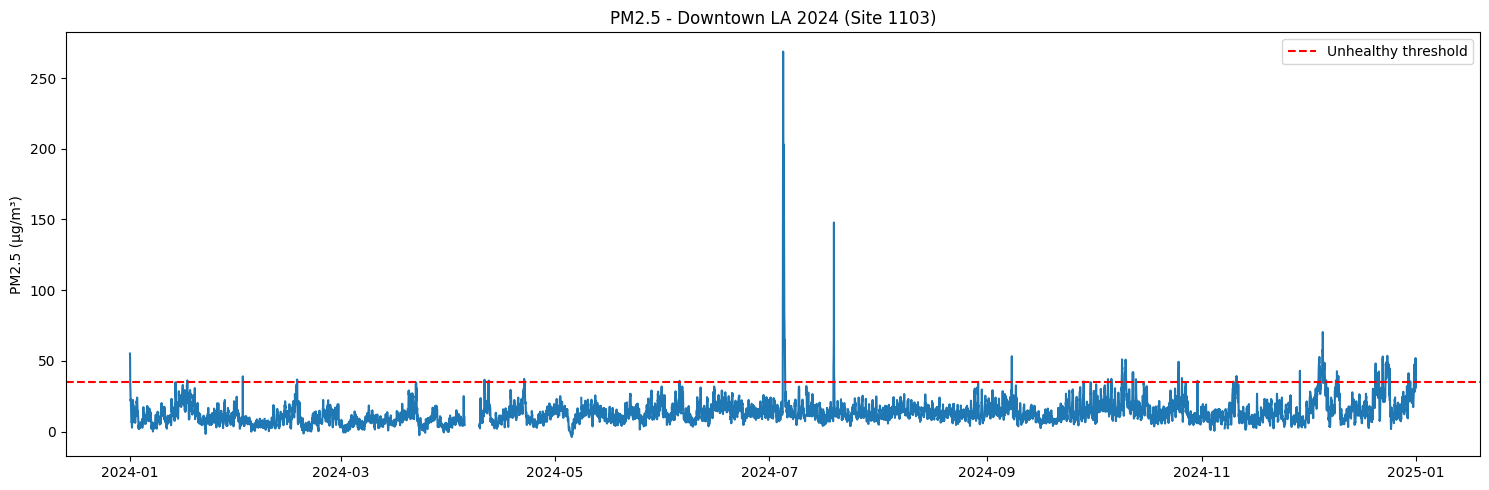

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r"C:\IP\greenmlops\data\raw\airquality\LA_AirQuality_Hourly_2024.csv")
df['datetime'] = pd.to_datetime(df['datetime'])

print("Dataset ready!")
print(f"Shape: {df.shape}")
print(f"\nTarget (PM2.5) stats:")
print(df['PM2.5'].describe())

# Plot PM2.5 over time
plt.figure(figsize=(15, 5))
plt.plot(df['datetime'], df['PM2.5'])
plt.title('PM2.5 - Downtown LA 2024 (Site 1103)')
plt.ylabel('PM2.5 (µg/m³)')
plt.axhline(35, color='r', linestyle='--', label='Unhealthy threshold')
plt.legend()
plt.tight_layout()
plt.savefig(r"C:\IP\greenmlops\data\raw\airquality\pm25_2024.png", dpi=150)
print("\nPlot saved!")